## About the Dataset

This dataset captures details of how **CO2 emissions** from a vehicle vary based on different features. It was sourced from the Canadian Government's official open data website and contains information compiled over a period of 7 years. The dataset includes **7,385 rows** and **12 columns**.

### Key Information

- **Model Abbreviations**:
  - **4WD/4X4**: Four-wheel drive
  - **AWD**: All-wheel drive
  - **FFV**: Flexible-fuel vehicle
  - **SWB**: Short wheelbase
  - **LWB**: Long wheelbase
  - **EWB**: Extended wheelbase

- **Transmission Types**:
  - **A**: Automatic
  - **AM**: Automated manual
  - **AS**: Automatic with select shift
  - **AV**: Continuously variable
  - **M**: Manual
  - **3 - 10**: Number of gears

- **Fuel Types**:
  - **X**: Regular gasoline
  - **Z**: Premium gasoline
  - **D**: Diesel
  - **E**: Ethanol (E85)
  - **N**: Natural gas

### Column Descriptions

- **Make**: Manufacturer of the vehicle.
- **Model**: Specific model of the car.
- **Vehicle Class**: Classification based on the vehicle’s utility, capacity, and weight.
- **Engine Size (L)**: Engine size in liters.
- **Cylinders**: Number of cylinders in the engine.
- **Transmission**: Transmission type, including the number of gears.
- **Fuel Type**: Type of fuel used by the vehicle.
- **Fuel Consumption City (L/100 km)**: Fuel consumption on city roads.
- **Fuel Consumption Hwy (L/100 km)**: Fuel consumption on highway roads.
- **Fuel Consumption Comb (L/100 km)**: Combined fuel consumption, based on 55% city and 45% highway driving.
- **Fuel Consumption Comb (mpg)**: Combined fuel consumption measured in miles per gallon.
- **CO2 Emissions (g/km)**: CO2 emissions in grams per kilometer, indicating the vehicle's environmental impact.

This dataset provides comprehensive data to analyze vehicle CO2 emissions in relation to various features such as fuel consumption, engine size, and transmission type.


# Perform analysis 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)  
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv("co2_emissions_data.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Emission Class
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,MODERATE
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,HIGH
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,MODERATE
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,HIGH
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,HIGH


In [3]:
df.shape

(7385, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
 12  Emissi

#### Unique Values and Value Counts

In [5]:
    for col in df.select_dtypes(include='object').columns:
        print(f"\nUnique values in {col}:")
        print(df[col].value_counts())


Unique values in Make:
Make
FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: count, dtype: int64

Unique values in Model:
Model
F-150 FFV               32
F-150

# Data Cleaning

In [6]:
print("\nMissing Values in Users Data:")
print(df.isnull().sum())



Missing Values in Users Data:
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
Emission Class                      0
dtype: int64


In [7]:
# Duplicated data
print("Duplicates in df :", df.duplicated().sum())

Duplicates in df : 1103


In [8]:
# drop all duplicate data
df = df.drop_duplicates()
df.shape

(6282, 13)

In [9]:
print(df.columns)

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'Emission Class'],
      dtype='object')


# check whether numeric features have the same scale

In [10]:
# Basic statistics summary of Numerical features

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel Consumption Comb (mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


In [11]:
# Basic statistics summary of Object features

df.describe(include= 'object').T

,count,unique,top,freq
Make,6282,42,FORD,577
Model,6282,2053,F-150 FFV,32
Vehicle Class,6282,16,SUV - SMALL,1006
Transmission,6282,27,AS6,1139
Fuel Type,6282,5,X,3039
Emission Class,6282,4,HIGH,4953


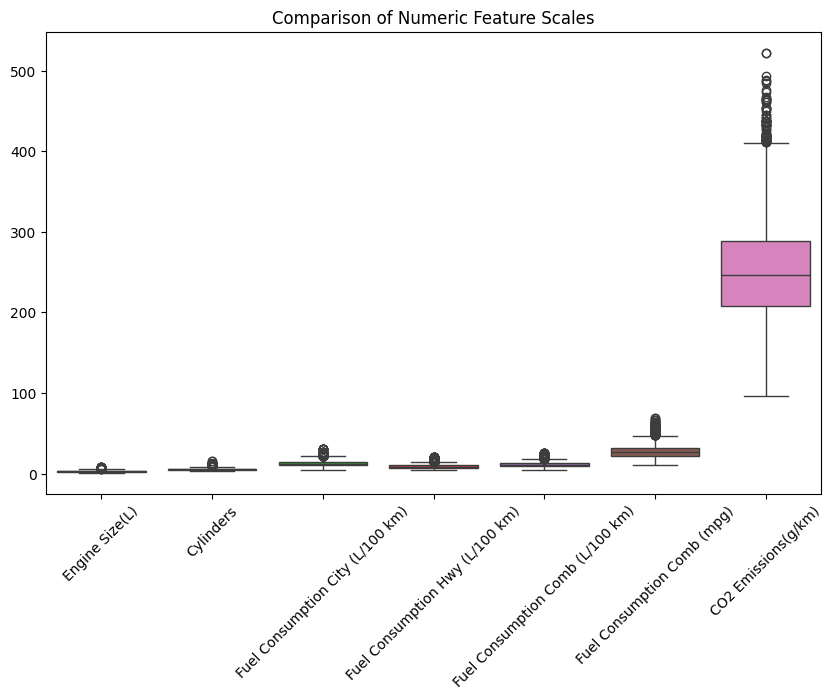

In [12]:
# Boxplot to visualize distributions and scales
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.title("Comparison of Numeric Feature Scales")
plt.show()

#### Check whether numeric features have the same scale

The numeric features do not appear to be on the same scale. Here’s why:

| Metric                           | Mean       | Min  | Max  |
|----------------------------------|------------|------|------|
| Engine Size (L)                  | 3.161812   | 0.9  | 8.4  |
| Cylinders                        | 5.618911   | 3.0  | 16.0 |
| Fuel Consumption City (L/100 km) | 12.610220  | 4.2  | 30.6 |
| Fuel Consumption Hwy (L/100 km)  | 9.070583   | 4.0  | 20.6 |
| Fuel Consumption Comb (L/100 km) | 11.017876  | 4.1  | 26.1 |
| Fuel Consumption Comb (mpg)      | 27.411016  | 11.0 | 69.0 |
| CO2 Emissions (g/km)             | 251.157752 | 96.0 | 522.0|



The features have different ranges, means, and standard deviations. This confirms that they are not on the same scale, which could affect certain analyses and models especially models sensitive to feature scaling like linear regression.

  

# Data Visualization

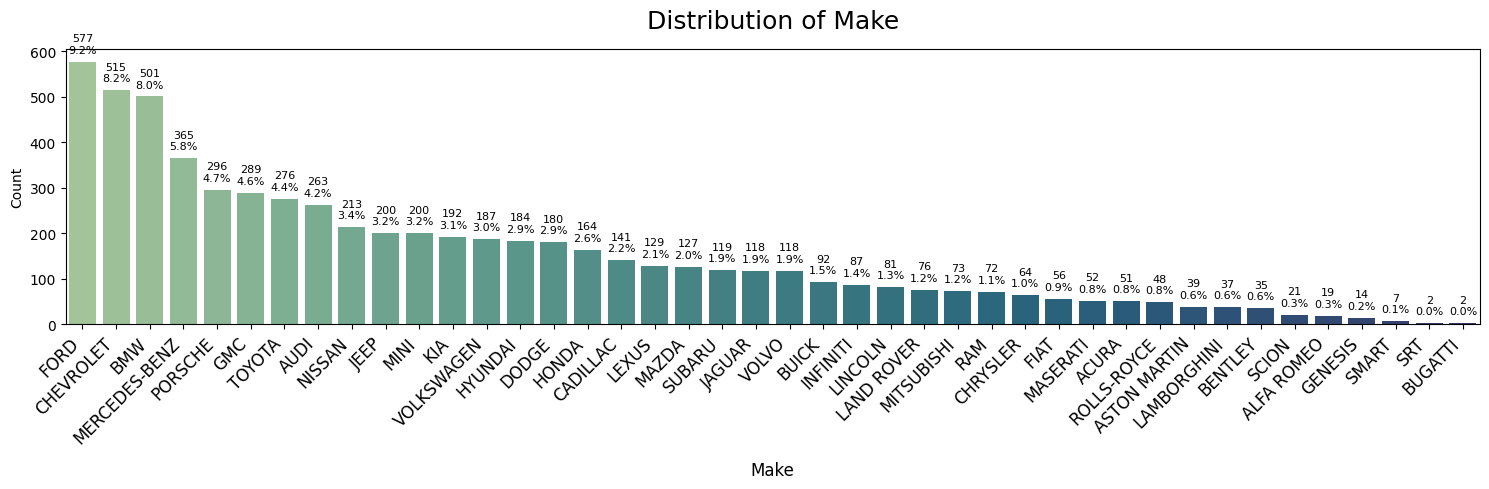

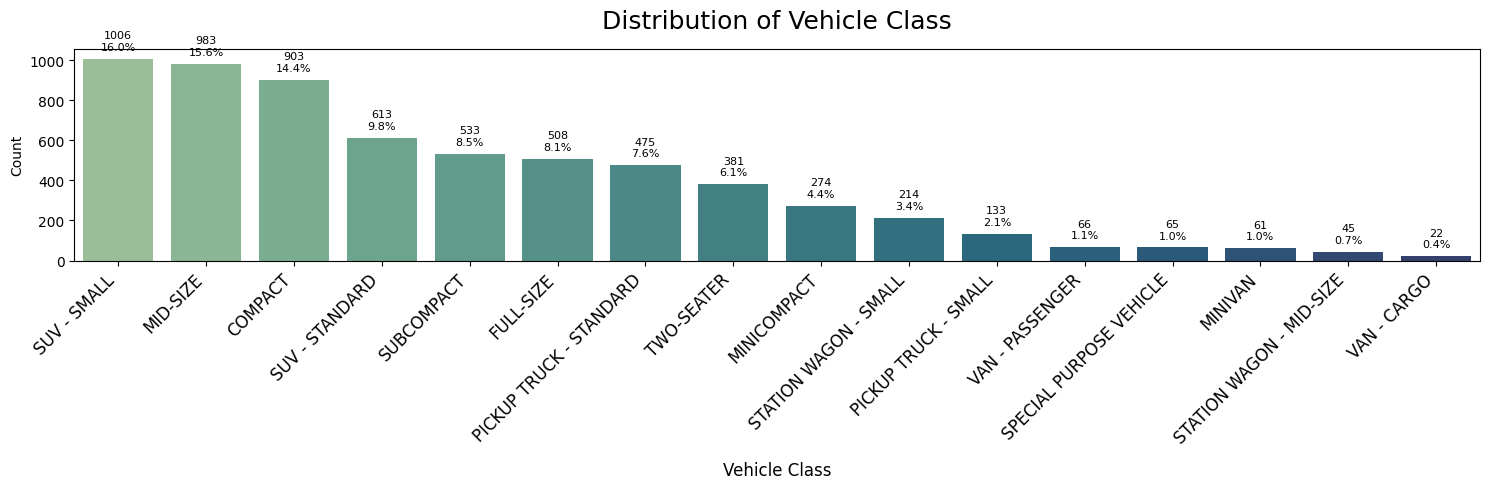

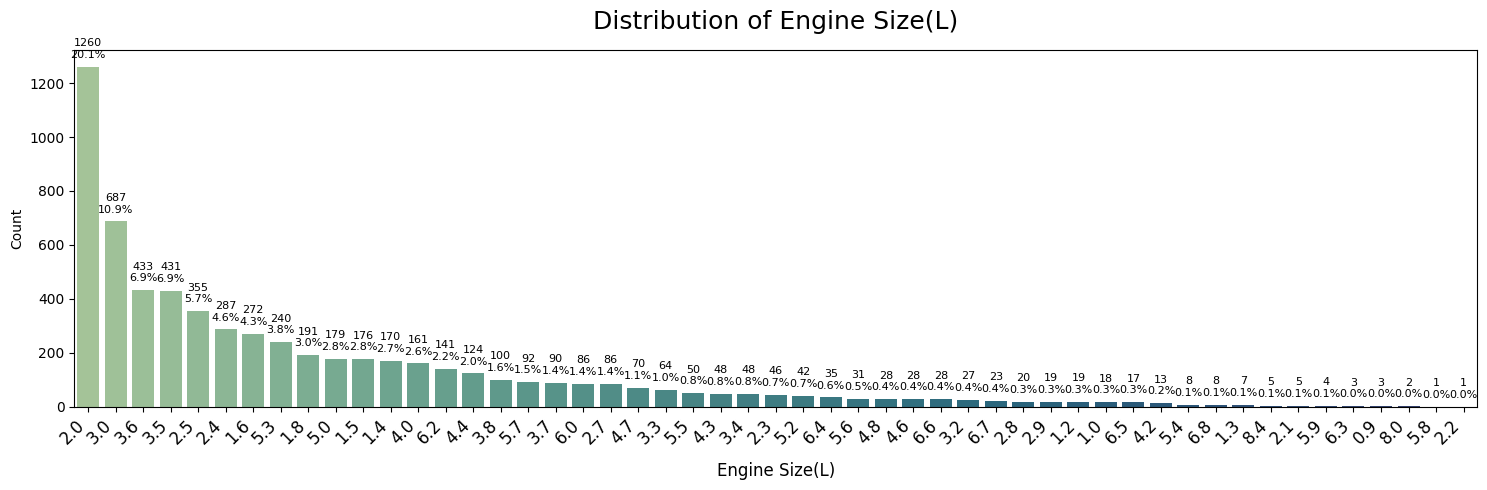

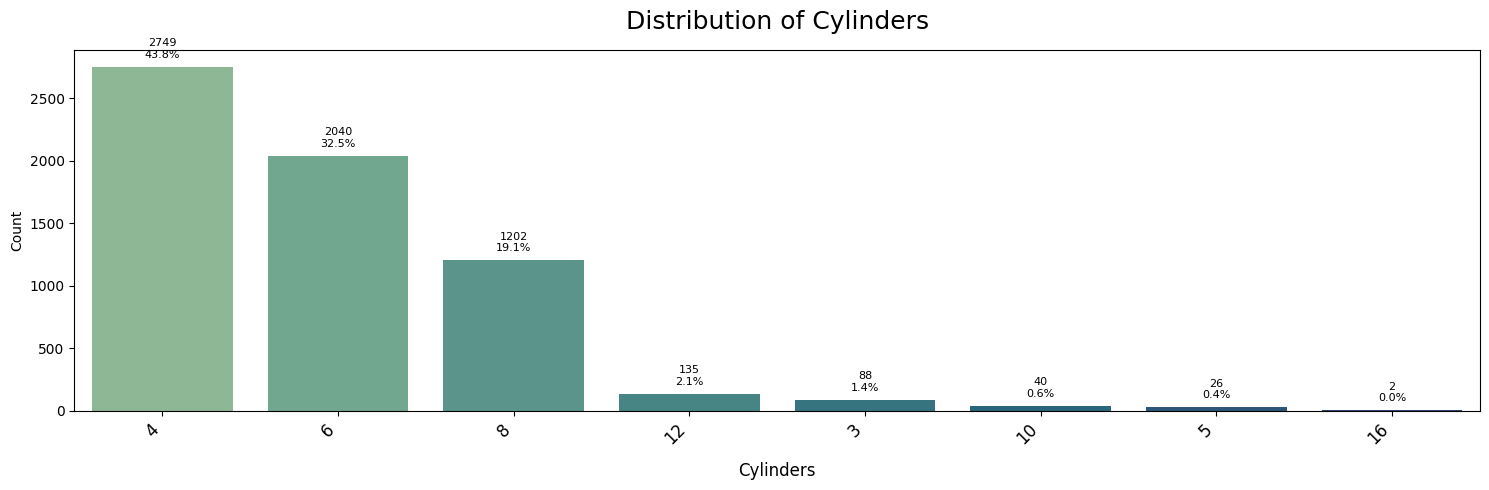

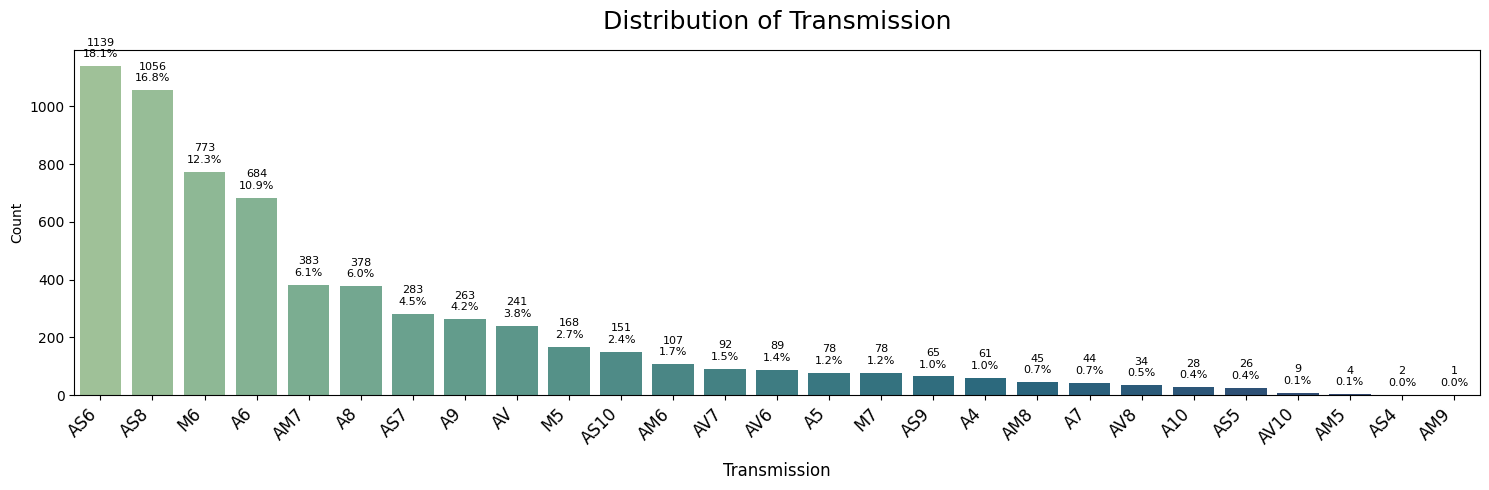

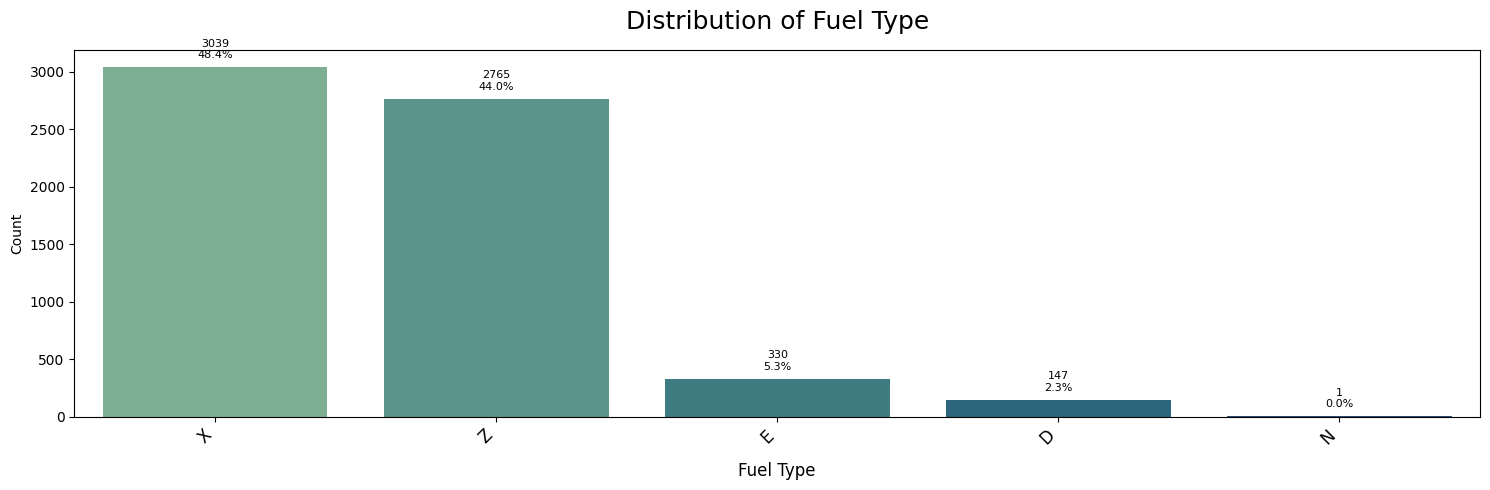

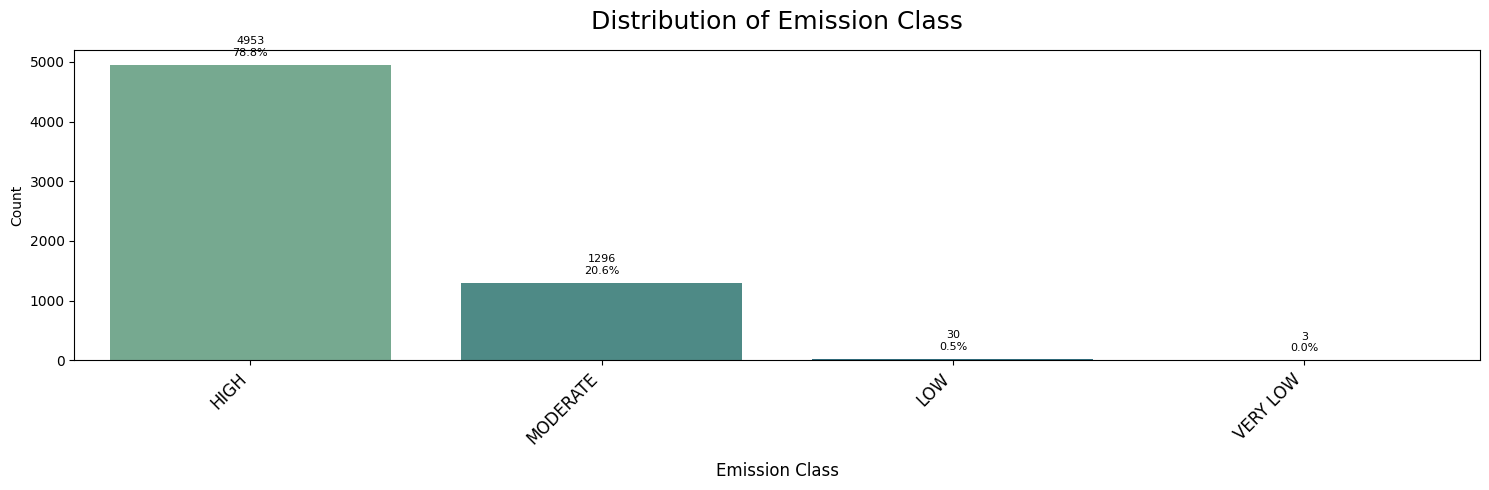

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_bar_graphs(df, columns):
    for column in columns:
        fig, ax = plt.subplots(figsize=(15, 5))

        sns.countplot(x=column, data=df, order=df[column].value_counts().index, ax=ax, palette="crest")

        total = len(df[column])  
        for p in ax.patches:
            count = int(p.get_height())
            percentage = f'{count / total:.1%}'  
            ax.annotate(f'{count}\n{percentage}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=8, color='black',
                        xytext=(0, 5), textcoords='offset points')

        ax.set_xlabel(column.replace('_', ' ').title(), fontsize=12, labelpad=10)
        ax.set_ylabel('Count', fontsize=10)
        ax.set_title(f'Distribution of {column.replace("_", " ").title()}', fontsize=18, pad=15)

        plt.xticks(rotation=45, ha='right', fontsize=12)
        
       
        plt.tight_layout()
        plt.show()

cat_features = ['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type', 'Emission Class']

plot_bar_graphs(df, cat_features)


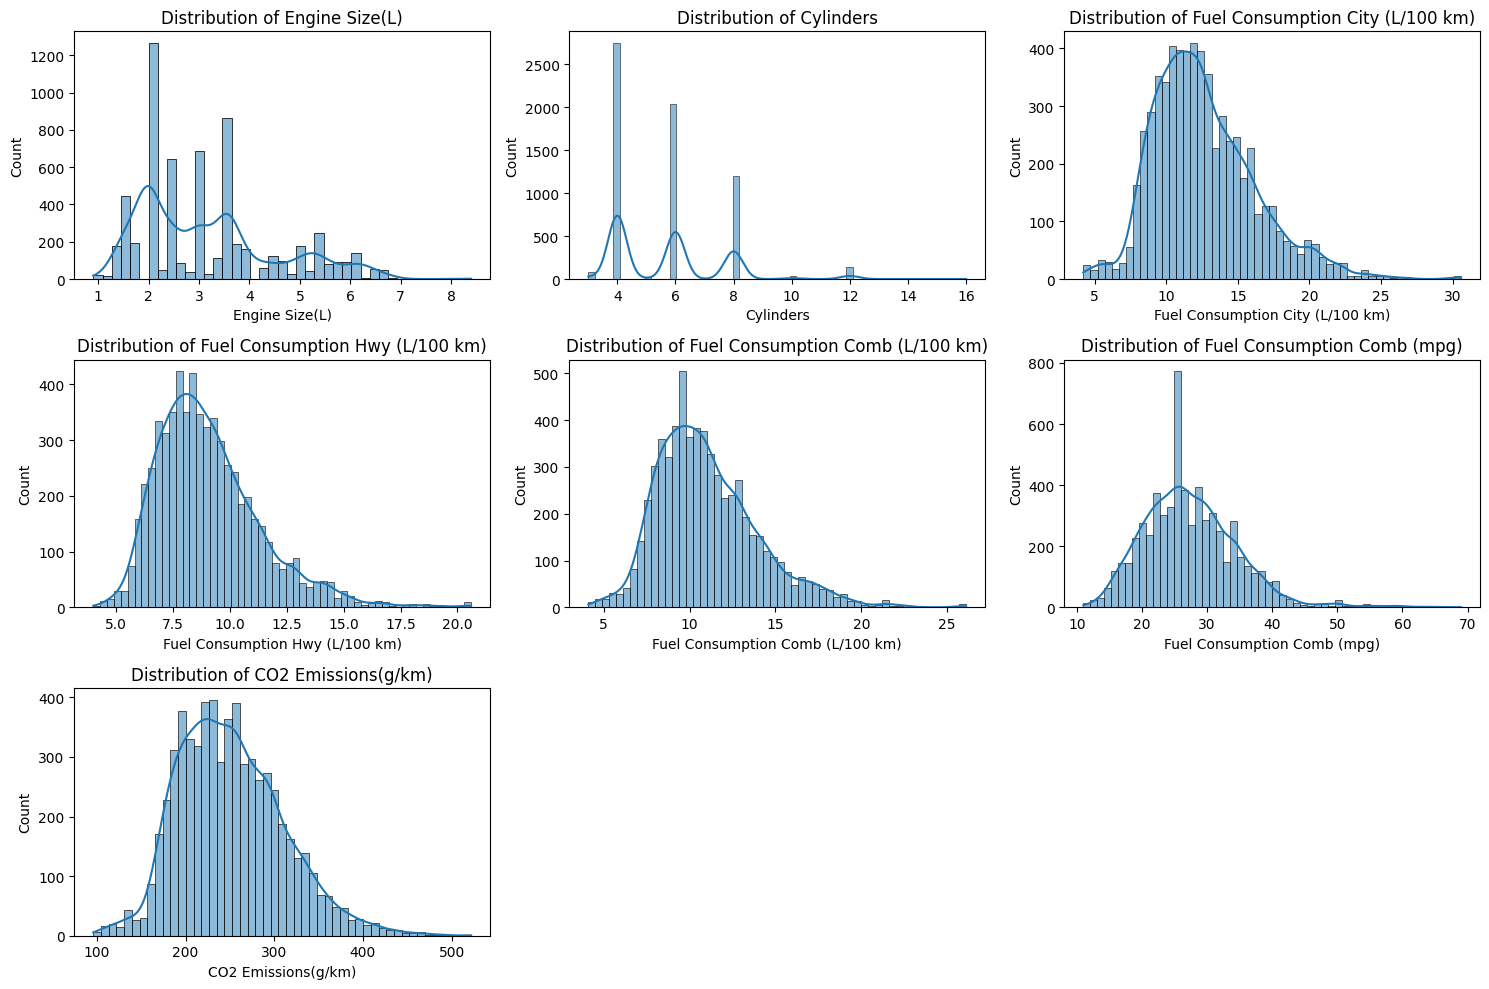

In [14]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))

num_vars = len(numerical_df.columns)

for i, var in enumerate(numerical_df.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    
plt.tight_layout()
plt.show()

# Visualize a pairplot in which diagonal subplots are histograms

#### Each subplot shows the relationship between two features in the dataset, allowing us to see trends, patterns, and correlations across the different pairs of features.

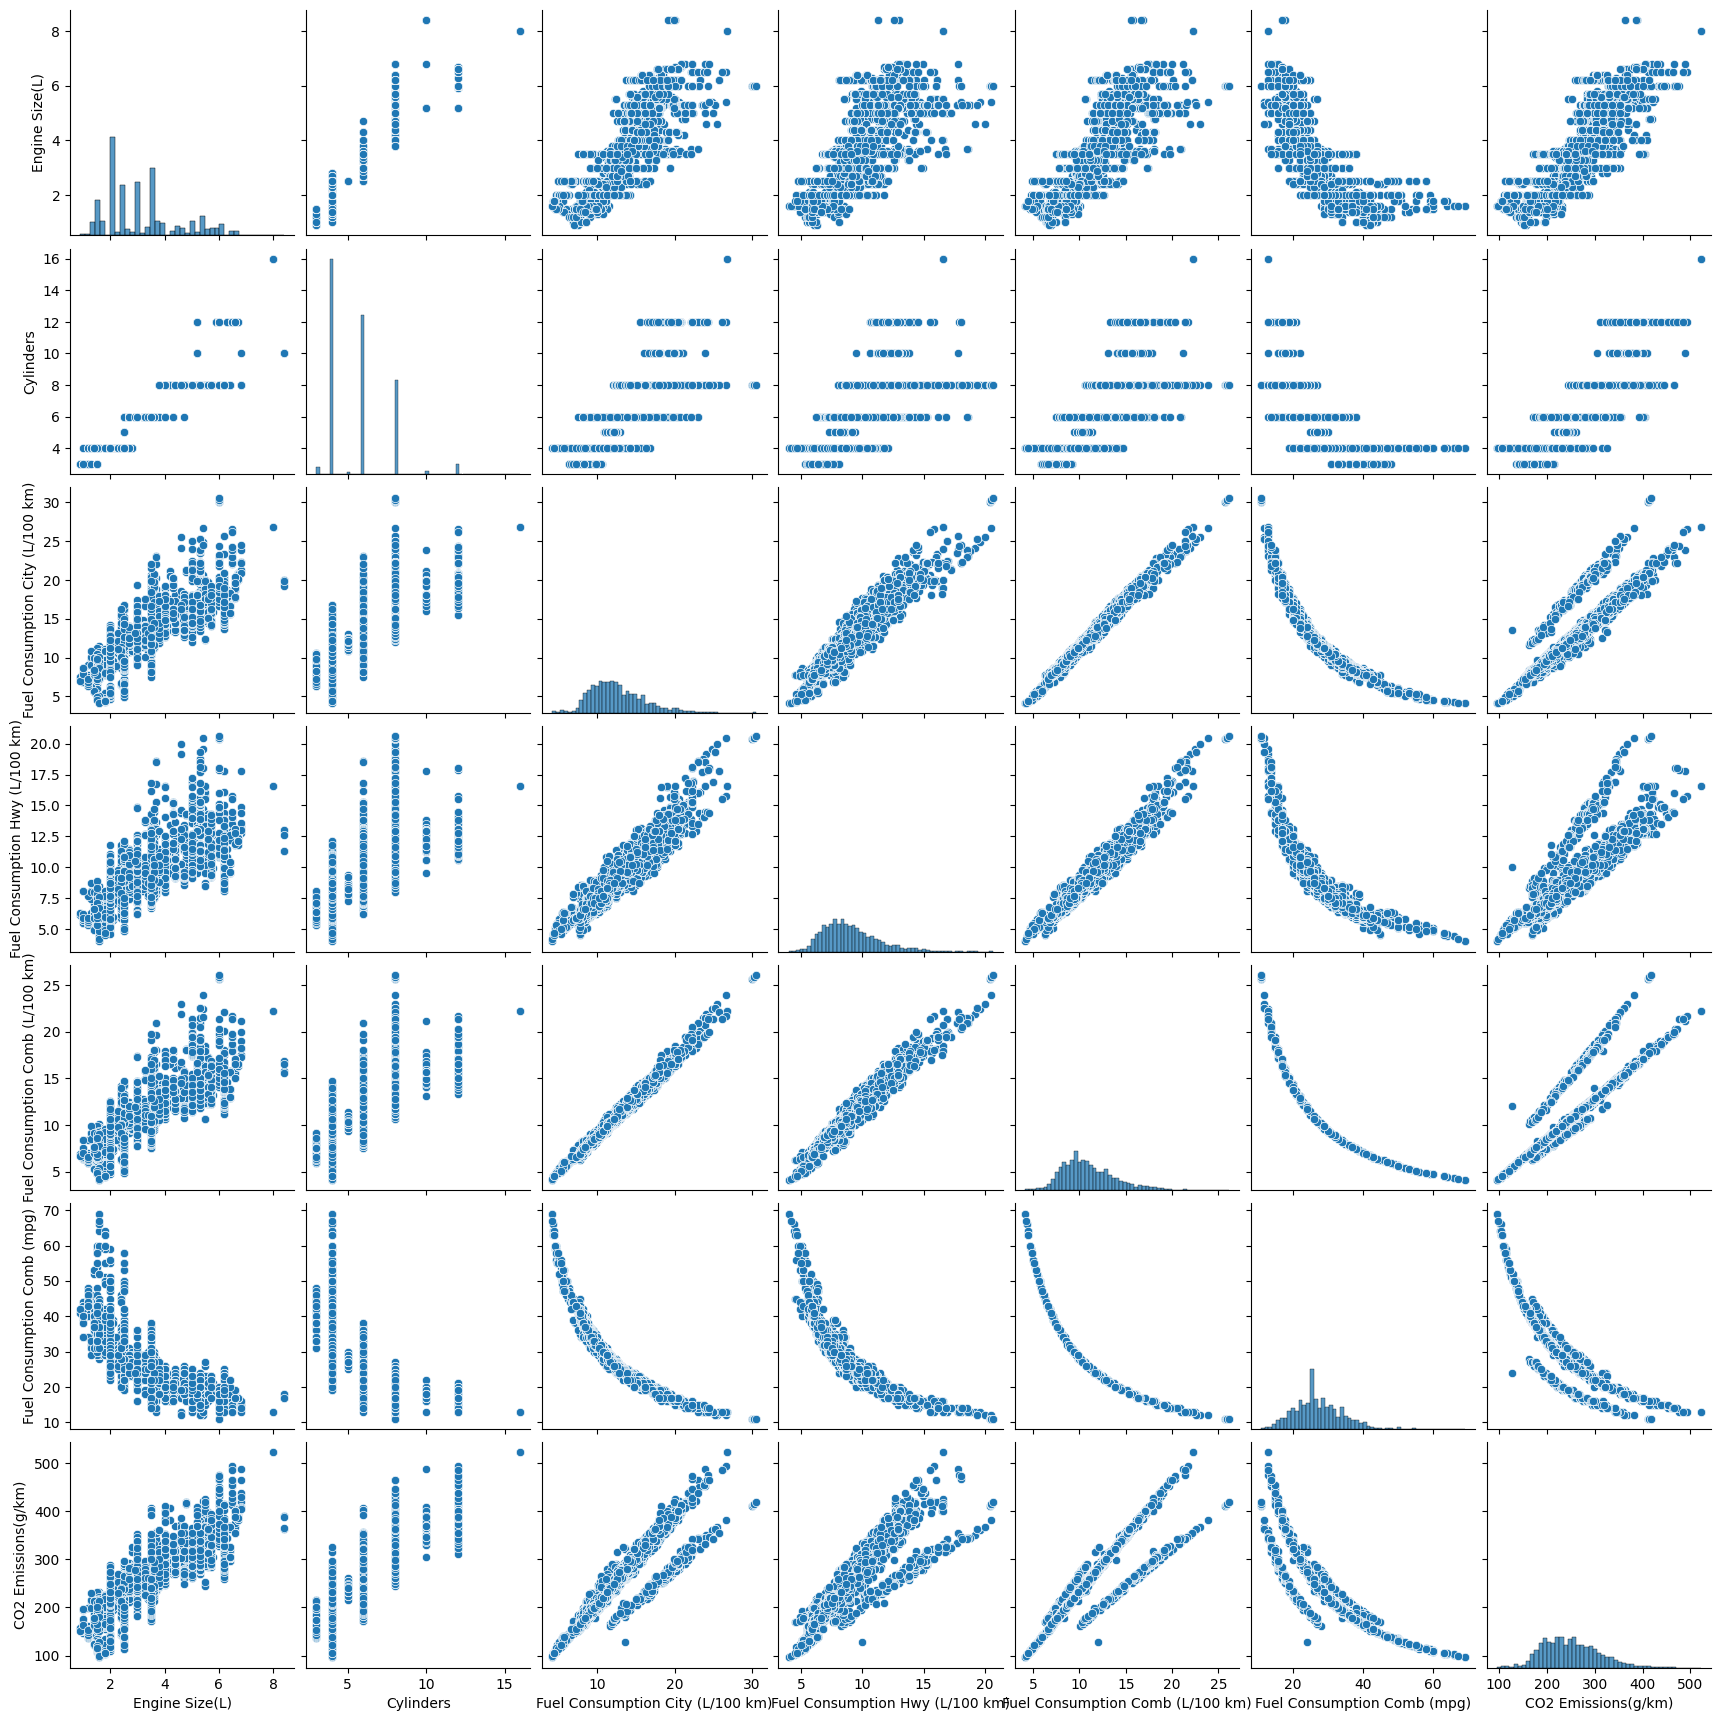

In [15]:
sns.pairplot(df, diag_kind="hist")

plt.show()

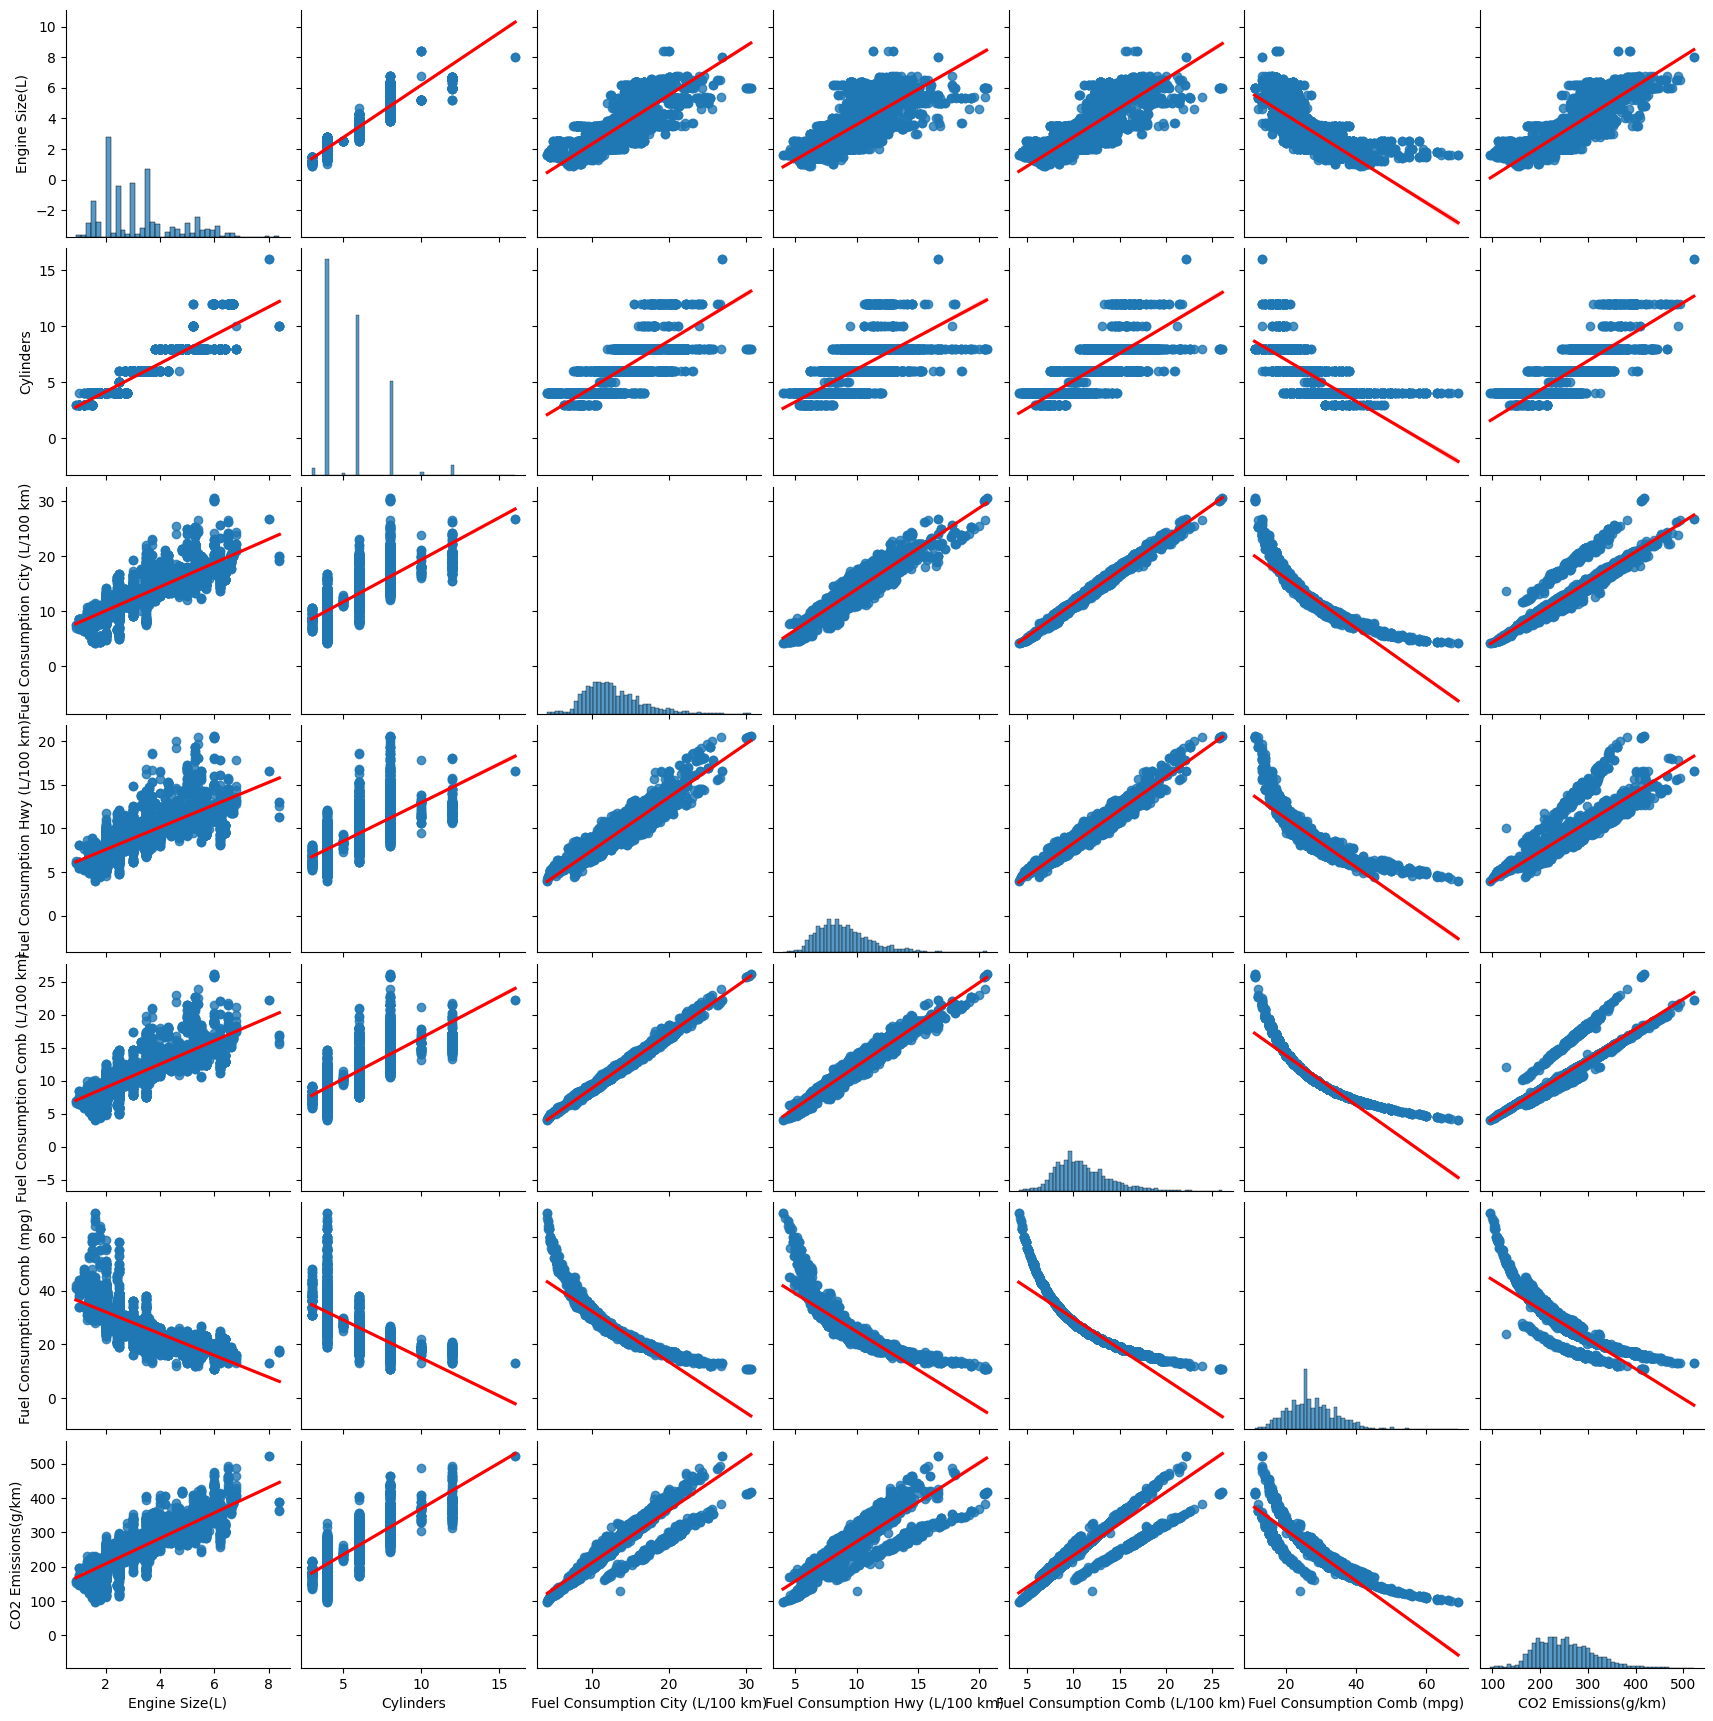

In [16]:
# Pairplot for the dataframe

sns.pairplot(df,
             kind="reg",    # scatter plots with regression lines
             diag_kind="hist",     
             plot_kws={"line_kws": {"color": "red"}}
            )

# visualize a correlation heatmap between numeric columns

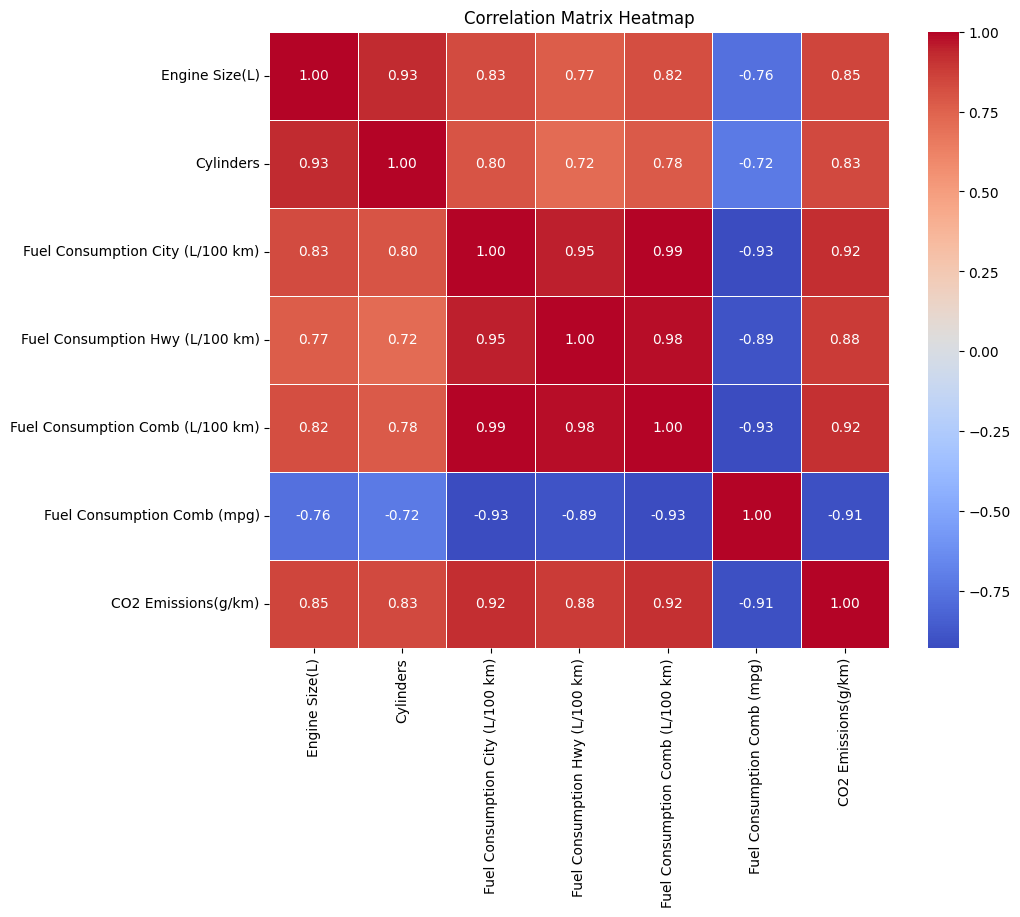

In [17]:
# Select only numeric columns
numeric_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix

correlation_matrix = numeric_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

This is a **correlation matrix heatmap**, which visualizes the correlation coefficients between pairs of numerical features in your dataset. The values range from -1 to 1:

- **1** indicates a perfect positive correlation.
- **-1** indicates a perfect negative correlation.
- **0** indicates no correlation.


### Key Insights

1. **Strong Positive Correlations**:
   - **Fuel Consumption Comb (L/100 km)** has a strong positive correlation with **Fuel Consumption City (L/100 km)** (0.99) and **Fuel Consumption Hwy (L/100 km)** (0.98). This indicates that combined fuel consumption is closely related to both city and highway consumption.
   - **Engine Size (L)** has a strong positive correlation with **Cylinders** (0.93), meaning that vehicles with larger engines tend to have more cylinders.
   - **CO₂ Emissions (g/km)** has a high positive correlation with **Fuel Consumption Comb (L/100 km)** (0.92), **Fuel Consumption City (L/100 km)** (0.92), and **Fuel Consumption Hwy (L/100 km)** (0.88). This suggests that higher fuel consumption is associated with higher CO₂ emissions.

2. **Strong Negative Correlations**:
   - **Fuel Consumption Comb (mpg)** has strong negative correlations with **Fuel Consumption City (L/100 km)** (-0.93), **Fuel Consumption Hwy (L/100 km)** (-0.89), and **CO₂ Emissions (g/km)** (-0.91). This indicates that higher miles per gallon (better fuel efficiency) is associated with lower fuel consumption and lower CO₂ emissions.

3. **Moderate Positive Correlations**:
   - **Engine Size (L)** and **CO₂ Emissions (g/km)** (0.85): Larger engine sizes are moderately associated with higher CO₂ emissions.
   - **Engine Size (L)** and **Fuel Consumption Comb (L/100 km)** (0.82): Larger engines tend to have higher combined fuel consumption.

### Summary of Insights

- **Fuel efficiency (mpg)** is inversely related to fuel consumption and CO₂ emissions, **confirming that more fuel-efficient vehicles emit less CO₂**.
- **Engine size** and **cylinders** are directly linked; larger engines tend to have more cylinders and higher fuel consumption.
- **Fuel consumption metrics** (city, highway, combined) are highly correlated with each other and with CO₂ emissions, indicating that higher fuel consumption generally leads to higher emissions.

These insights suggest that **reducing fuel consumption** (improving fuel efficiency) could be a key strategy for reducing CO₂ emissions in vehicles.


# Preprocess the data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
 12  Emission Cl

### Seperate Features and Targets

In [19]:
#Sepearating the features and the targets
X = df.drop(columns=['CO2 Emissions(g/km)', 'Emission Class'])  
y = df[['CO2 Emissions(g/km)', 'Emission Class']]  

print("Features : \n")
print(X.head())
print("\n Targets :")
print(y.head())

Features : 

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2      

#### The data is shuffled and split into training and testing sets

In [20]:
#Training and Testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(df.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

(6282, 13)
X_train shape: (5025, 11)
X_test shape: (1257, 11)
y_train shape: (5025, 2)
y_test shape: (1257, 2)


 ### Encoding categorical features and targets

### One-Hot Encoding

After splitting, we apply **One-Hot Encoding** on the training and test features using `pd.get_dummies()`. We ensure that both the training and test sets undergo the same encoding process. The `align()` method ensures that both the training and test sets have the same columns, filling any missing columns in the test set with 0s. This step is necessary because, after one-hot encoding, the sets may have different categories (e.g., a category in the training set might not appear in the test set).

### Label Encoding

**Label Encoding** is applied to the `emission_class` target variable. The `fit_transform()` method is used on the training set to fit the encoder and encode the classes. The `transform()` method is used on the test set to ensure the same encoding is applied.


In [21]:
from sklearn.preprocessing import LabelEncoder
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

label_encoder = LabelEncoder()

y_train['Emission Class'] = label_encoder.fit_transform(y_train['Emission Class'])
y_test['Emission Class'] = label_encoder.transform(y_test['Emission Class'])

print("\nEncoded Training Features (X_train):")
print(X_train_encoded.head())
print("\nEncoded Test Features (X_test):")
print(X_test_encoded.head())
print("\nEncoded Training Target (y_train):")
print(y_train.head())
print("\nEncoded Test Target (y_test):")
print(y_test.head())


Encoded Training Features (X_train):
      Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
6622             2.0          4                              10.0   
106              4.4          8                              15.0   
1503             5.0          8                              14.9   
3144             2.7          6                              10.7   
1528             6.0          8                              22.0   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
6622                              8.2                               9.2   
106                               9.8                              12.7   
1503                              9.5                              12.4   
3144                              7.4                               9.2   
1528                             14.9                              18.8   

      Fuel Consumption Comb (mpg)  Make_ALFA ROMEO  Make_ASTON MARTIN  \
6622                   

### Scaling numeric features 

We use **StandardScaler**  to standardize numeric columns in the dataset. Standardization is the process of scaling features so they have a mean of 0 and a standard deviation of 1, which helps algorithms perform better by ensuring that features contribute equally.
The formula for standardization is:

The standardization equation is:

$$
z = \frac{x - \mu}{\sigma}
$$

where:
- $x$ is the original feature value,
- $\mu$ is the mean of the feature in the training set,
- $\sigma$ is the standard deviation of the feature in the training set,
- $z$ is the standardized value.



In [22]:
from sklearn.preprocessing import StandardScaler

numeric_features = X.select_dtypes(include=['float64', 'int64']).columns


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

X_train[numeric_features] = X_train_scaled
X_test[numeric_features] = X_test_scaled

print("Scaled Training Data:\n", X_train_scaled)
print("\nScaled Test Data:\n", X_test_scaled)


Scaled Training Data:
 [[-0.84946717 -0.87380374 -0.72924759 -0.37876225 -0.61200082  0.49144898]
 [ 0.91379859  1.30528499  0.67715608  0.32219726  0.57438064 -0.7518122 ]
 [ 1.35461502  1.30528499  0.649028    0.19076735  0.4726908  -0.61367207]
 ...
 [-0.84946717 -0.87380374 -0.78550374 -0.729242   -0.78148388  0.62958911]
 [-0.84946717 -0.87380374 -1.06678447 -0.90448188 -1.01876018  1.04400951]
 [-0.48212013 -0.87380374 -0.86988796 -0.729242   -0.8153805   0.76772925]]

Scaled Test Data:
 [[-0.1147731   0.21574063  0.28336305  0.4098172   0.33710435 -0.47553194]
 [-0.1147731   0.21574063 -0.1948142  -0.24733234 -0.20524146 -0.06111154]
 [ 0.32604334  0.21574063  0.62089993  0.58505707  0.60827725 -0.7518122 ]
 ...
 [ 1.20767621  1.30528499  0.78966837  0.32219726  0.64217386 -0.7518122 ]
 [-0.99640598 -0.87380374 -0.84175988 -1.03591178 -0.91707034  0.90586938]
 [-0.84946717 -0.87380374 -0.89801603 -0.86067191 -0.91707034  0.90586938]]


##  Implement linear regression using gradient descent from scratch to predict the CO2 emission amount.

Based on the correlation matrix heatmap, the two features that appear to have a strong relationship with the target variable (CO2 Emissions) while not being too highly correlated with each other are:

**Engine Size (L)**
<br>
**Fuel Consumption Combo (L/100 km)**


### 2. Linear Regression from Scratch

The hypothesis for the linear regression model is:

$$
\hat{y} = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2
$$

Where:
- $\hat{y}$ is the predicted target (e.g., CO2 emissions),
- $x_1$ and $x_2$ are the selected independent variables (features),
- $\theta_0$ is the bias term (intercept),
- $\theta_1$ and $\theta_2$ are the weights (coefficients) for the features.

### 3. Cost Function

The cost function for linear regression is the **Mean Squared Error (MSE)**, and is defined as:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

Where:
- $ m $ is the number of training samples,
- $\hat{y}_i$ is the predicted value for the \(i\)-th sample,
- $y_i$ is the actual value for the \(i\)-th sample.

### 4. Gradient Descent

The gradient descent algorithm updates the weights and bias to minimize the cost function. The update rule for each parameter $\theta_j$ is:

$$
\theta_j = \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i) \cdot x_j
$$

Where:
- $\alpha$ is the learning rate, which controls the size of the steps taken towards the minimum of the cost function.



In [23]:
# Select the two features based on the correlation heatmap
X_train_selected = X_train_encoded[['Fuel Consumption Comb (L/100 km)', 'Engine Size(L)']].values
X_test_selected = X_test_encoded[['Fuel Consumption Comb (L/100 km)', 'Engine Size(L)']].values

In [24]:
# Add a bias column (intercept) for each feature
X_train_selected = np.c_[np.ones(X_train_selected.shape[0]), X_train_selected] 
X_test_selected = np.c_[np.ones(X_test_selected.shape[0]), X_test_selected]

In [25]:
# Function to compute the hypothesis (prediction)
def hypothesis(X, theta):
    return np.dot(X, theta) # The np.dot(X, theta) operation calculates the dot product between the feature matrix X and the parameter vector theta "which is cofficient in equation"

In [26]:
# Cost function (Mean Squared Error)
def cost_function(X, y, theta):
    m = len(y)  # Number of training examples
    predictions = hypothesis(X, theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))  # MSE formula
    return cost


In [27]:
# Gradient Descent function
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []  # Store the cost at each iteration
    
    # Set up the plot for the iterations
    plt.figure(figsize=(10, 6))
    
    for i in range(iterations):
        predictions = hypothesis(X, theta)
        errors = predictions - y
        gradient = (1 / m) * np.dot(X.T, errors)
        theta -= learning_rate * gradient
        cost_history.append(cost_function(X, y, theta))
        
        # Plotting the line fit after every certain number of iterations
        if i < 10 or i == 2000:  # Adjust the frequency of the plot updates
            plt.scatter(X[:, 1], y, color='blue', label='Data Points')
            plt.plot(X[:, 1], predictions, color='red', label=f'Iteration {i}')
            plt.xlabel('Feature')
            plt.ylabel('Emission')
            plt.title('Fitting Line Over Iterations')
            plt.legend()
            plt.pause(0.5)  # Pause to view each plot

    plt.show()
    return theta, cost_history


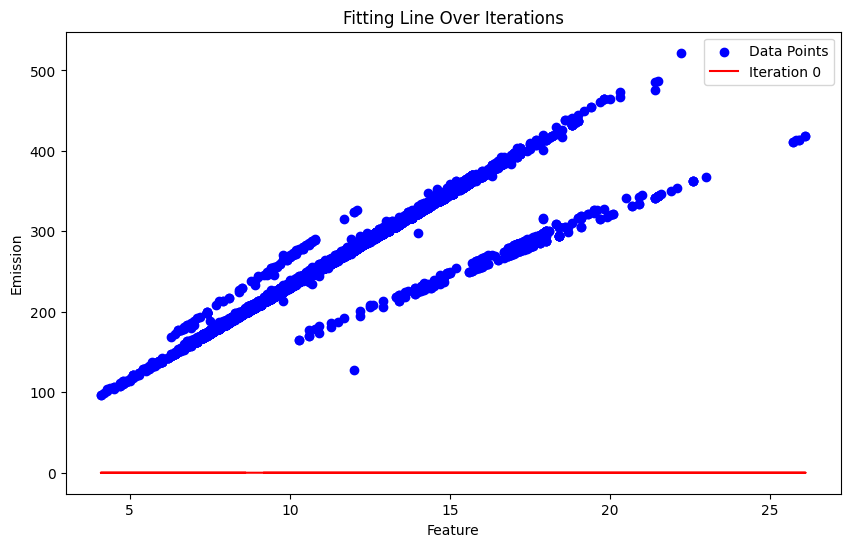

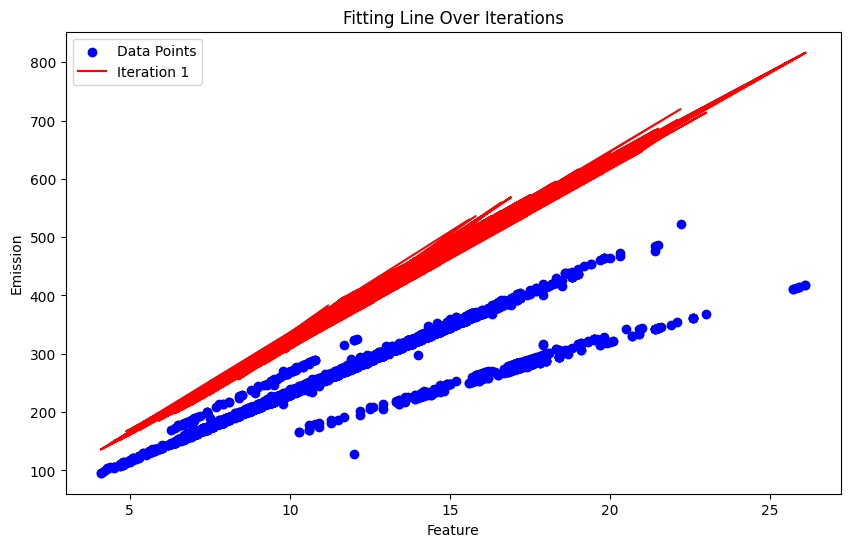

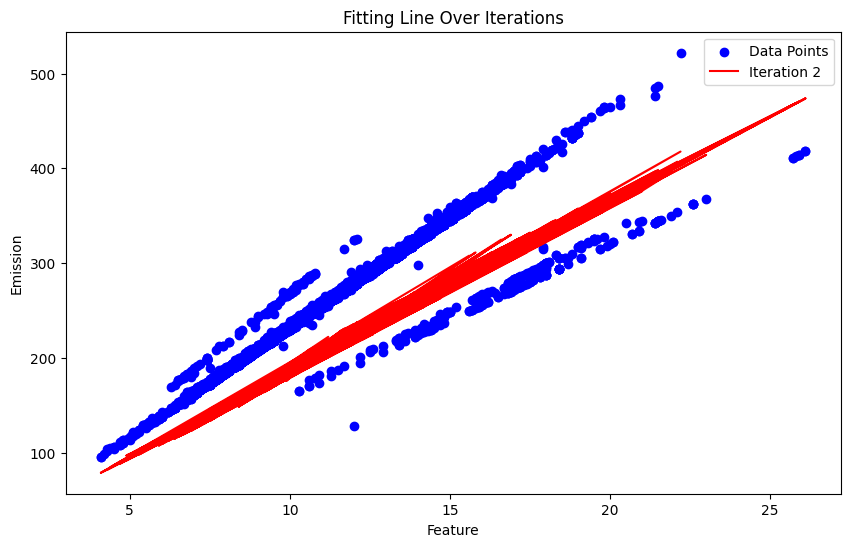

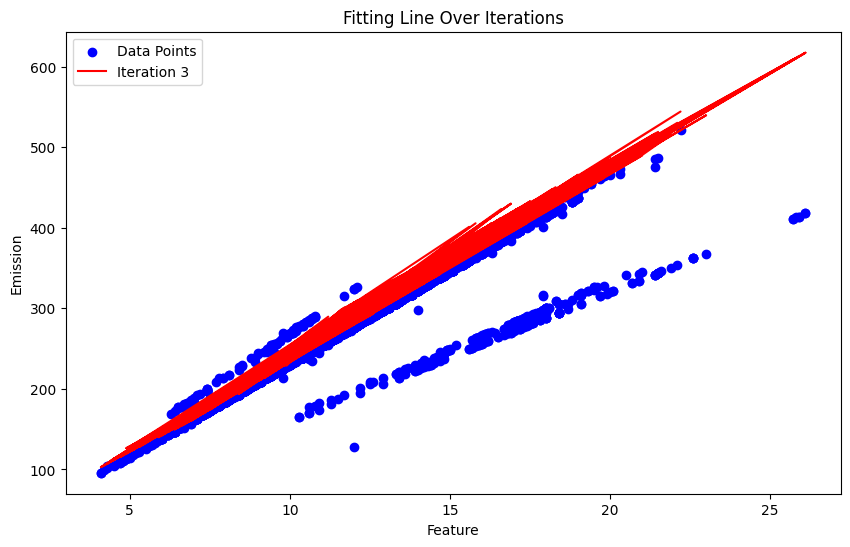

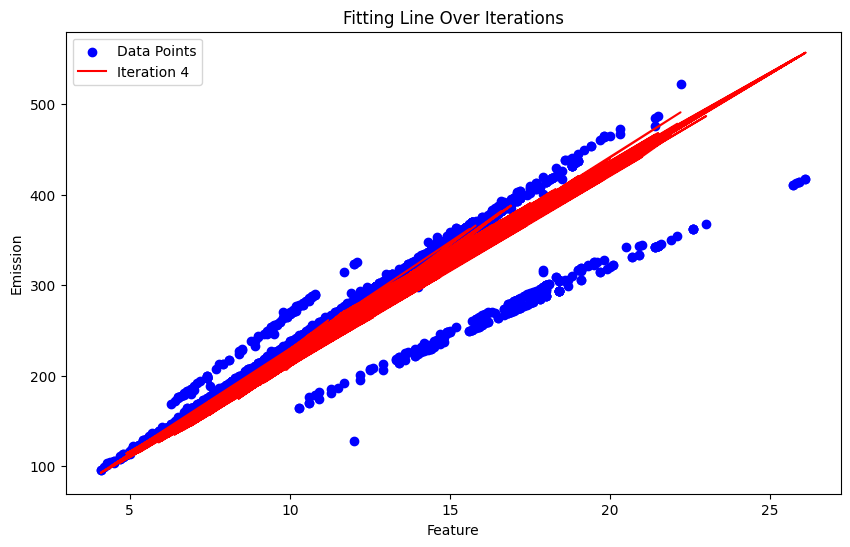

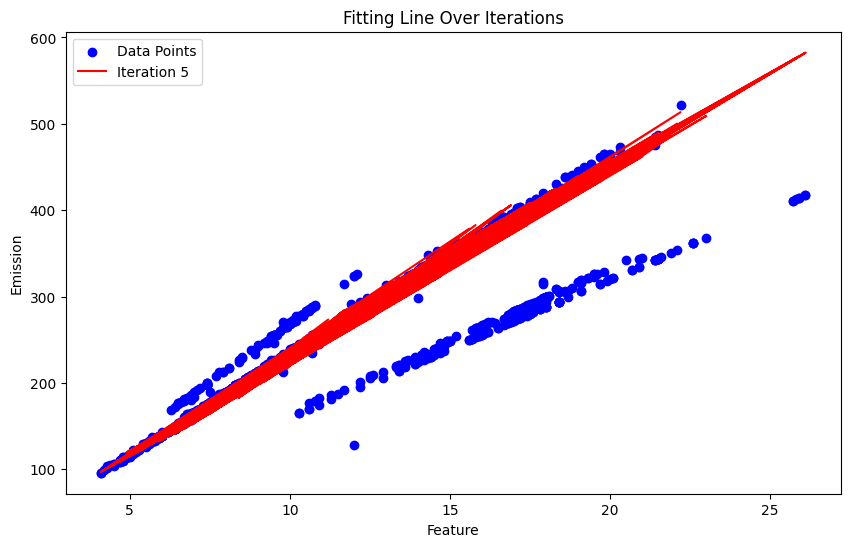

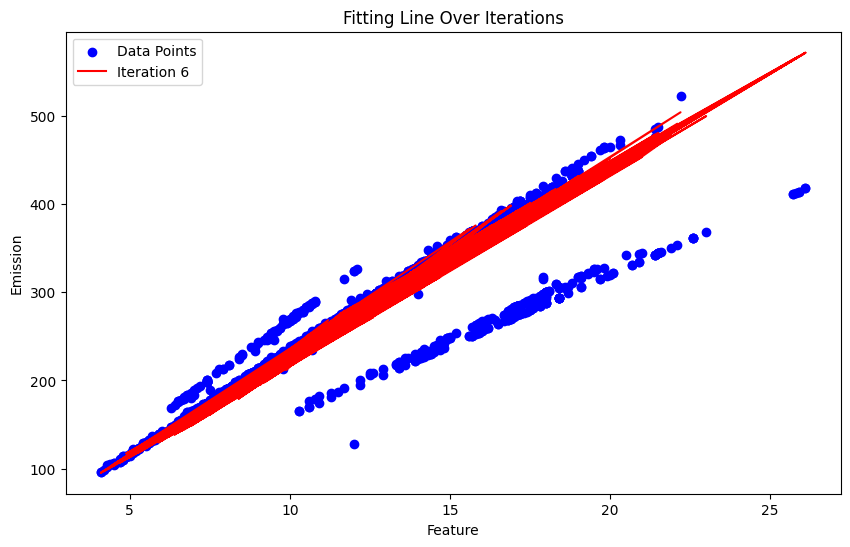

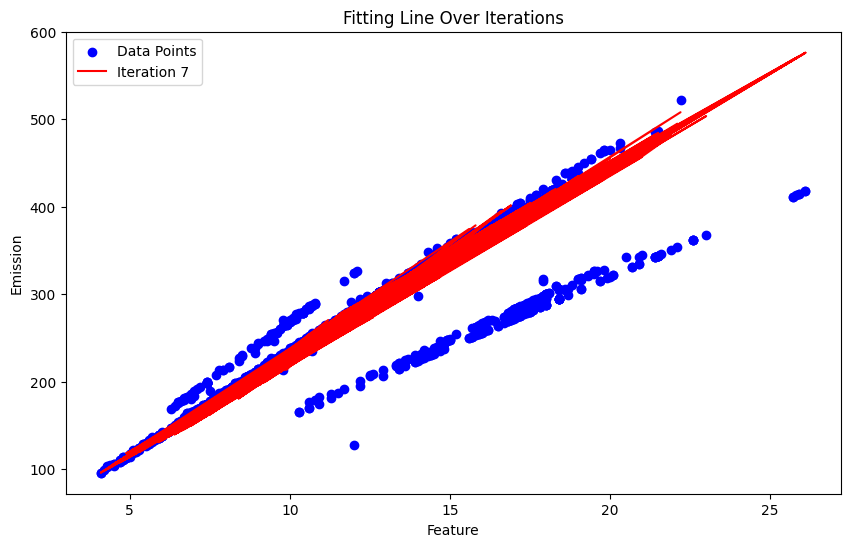

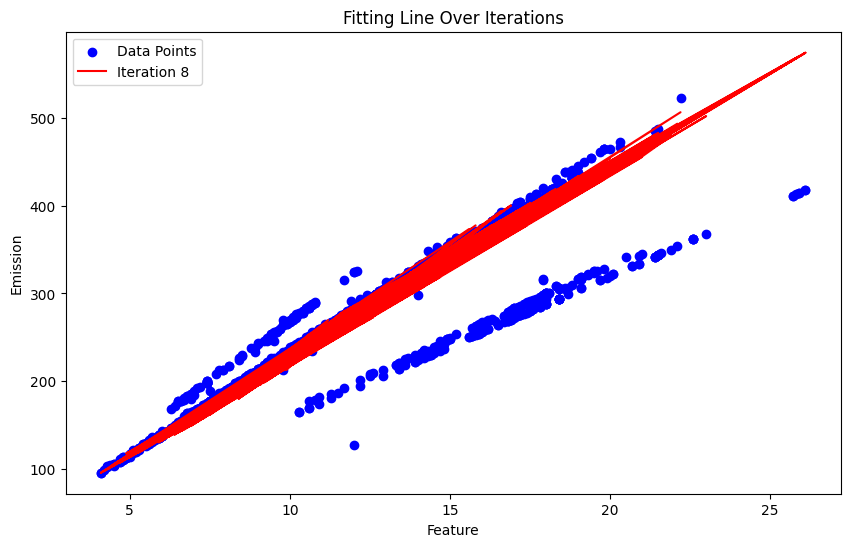

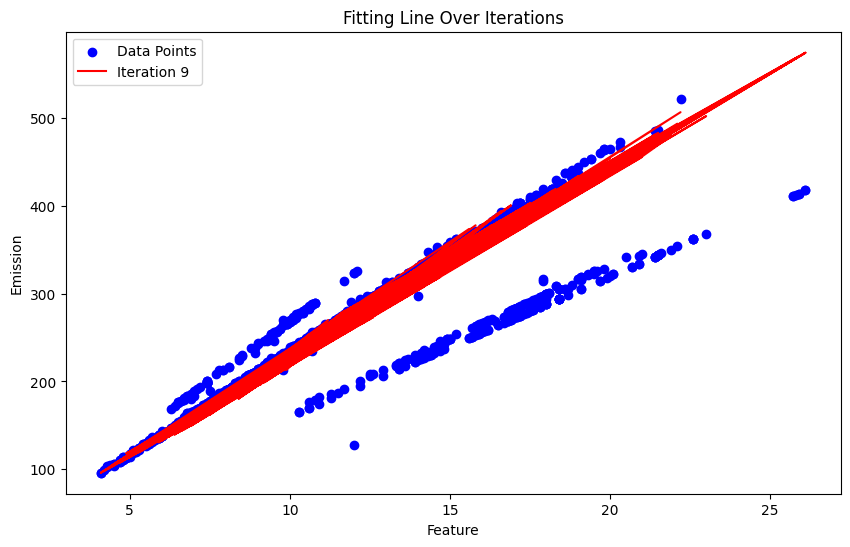

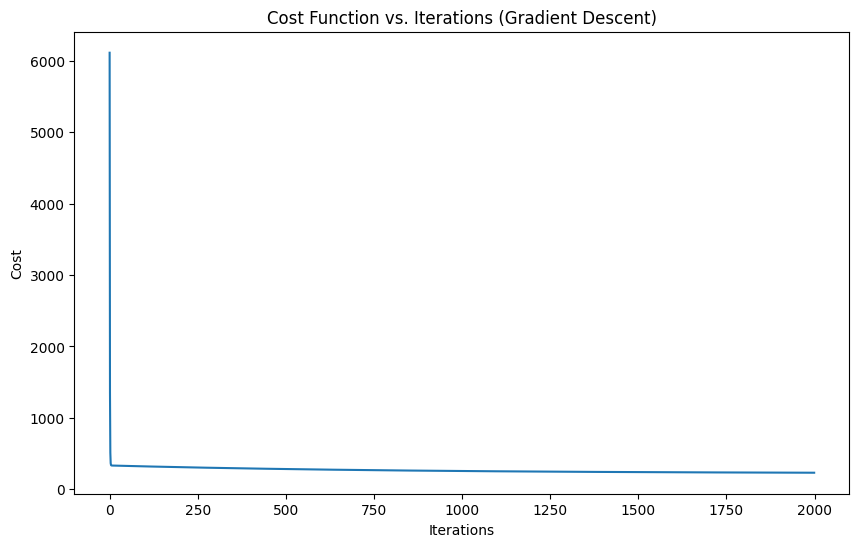

In [28]:
y_train_values = y_train['CO2 Emissions(g/km)'].values  
learning_rate = 0.01
iterations = 2000

theta_initial = np.zeros(X_train_selected.shape[1])  # Initialize theta to zeros
theta_final, cost_history = gradient_descent(X_train_selected, y_train_values, theta_initial, learning_rate, iterations)
# Plot the cost function to visualize error improvement
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs. Iterations (Gradient Descent)')
plt.show()

In [29]:
# Make predictions on the test set
y_test_pred = hypothesis(X_test_selected, theta_final)

## Evaluate Model

# logistic regression model to the data to predict the emission class

In [30]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score


# Initialize the SGDClassifier with logistic regression
sgd_clf = SGDClassifier(loss="log_loss", max_iter=2000, tol=1e-3, random_state=42)


# Train the logistic regression model using SGD on the training data
sgd_clf.fit(X_train_selected, y_train['Emission Class'].values)


# Make predictions on the test data
y_test_pred = sgd_clf.predict(X_test_selected)

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test['Emission Class'].values, y_test_pred)
print(f'Accuracy of the logistic regression model on the test set: {accuracy:.4f}')

Accuracy of the logistic regression model on the test set: 0.9769


In [32]:
from sklearn.metrics import  classification_report

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test['Emission Class'].values,y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       994
           1       0.00      0.00      0.00         5
           2       0.95      0.93      0.94       258

    accuracy                           0.98      1257
   macro avg       0.65      0.64      0.64      1257
weighted avg       0.97      0.98      0.97      1257



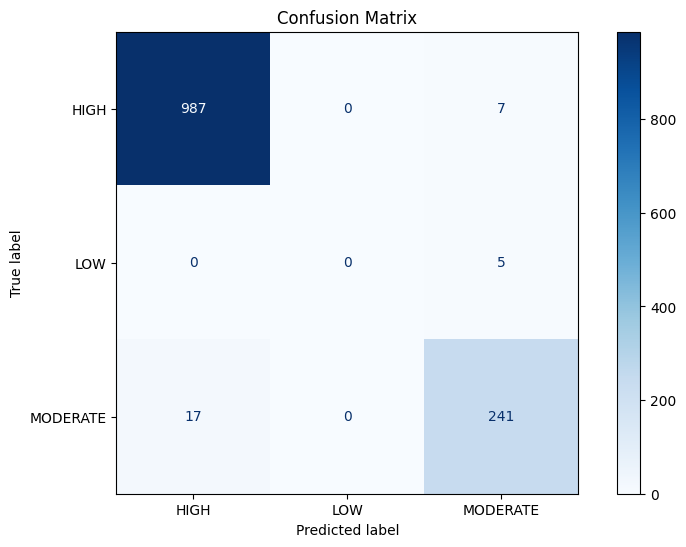

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Inverse transform to get original labels
y_true_original = label_encoder.inverse_transform(y_test['Emission Class'].values)
y_pred_original = label_encoder.inverse_transform(y_test_pred)

cm = confusion_matrix(y_true_original, y_pred_original)

# Get the unique class labels in the confusion matrix
unique_classes = sorted(set(y_true_original) | set(y_pred_original))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()